# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import sys
import pickle
import math
import time
# import resource
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec 
from mpl_toolkits.mplot3d import Axes3D
import csv 
import numpy as np
# from tqdm import tqdm
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x
    
import random 
import tensorflow as tf 
from PIL import Image 
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer 
from sklearn.utils import resample 
%matplotlib inline 

# TODO: Fill this in based on where you saved the training and testing data
training_file ='train.p'
testing_file ='test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

sign_names = np.recfromcsv('signnames.csv', delimiter=',')

# print(sign_names[2]) # Returns numpy record

train_images_original, train_labels_original = train['features'], train['labels']
test_images, test_labels = test['features'], test['labels']


print('files loaded and separated')

files loaded and separated


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# number of training examples
n_train = len(train_images_original) 

# number of testing examples
n_test = len(test_images) 

# The shape of an traffic sign image
image_shape = train_images_original.shape 

# How many unique classes/labels there are in the dataset.
n_classes = len(set(train_labels_original)) 

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Unique Labels or "Classes" = 43


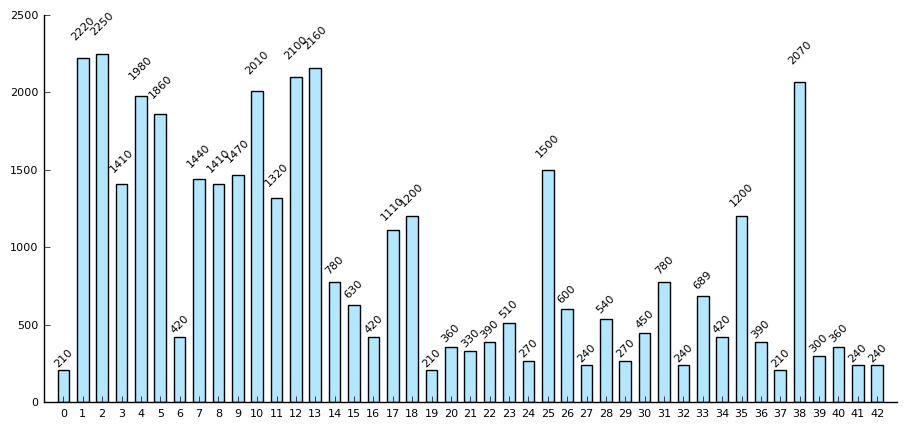

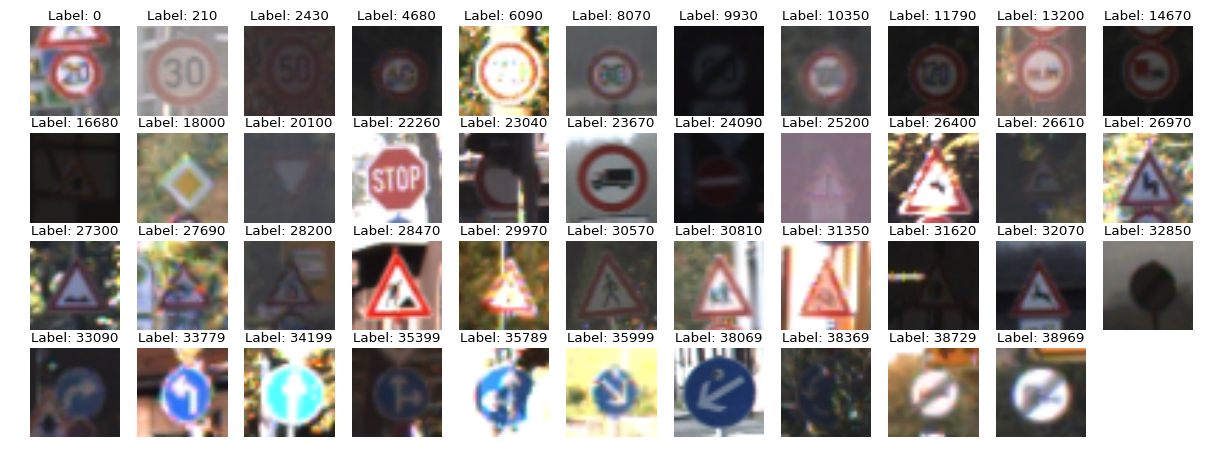

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


unique_labels, unique_labels_indices, unique_counts =  np.unique(train_labels_original, 
            return_index=True, return_counts=True)
print('Unique Labels or "Classes" =',len(unique_labels))


font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : 8}

plt.rc('font', **font)

y = unique_counts
x = unique_labels
N = 43
width = 0.6
ind = np.arange(N)
fig = plt.figure(figsize=(11, 5))
ax = plt.subplot(111)
ax.set_xlim([-1,43])
ax.set_xticks(ind)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

rects1 = ax.bar(x, y,width,color='#b3e6ff',align='center')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%d' % int(height), 
                ha='center', va='bottom', rotation=45)

autolabel(rects1)



plt.figure(figsize=(15, 15))
i = 1
uniqueList = []
uniqueList.append([])
uniqueList.append([])
    
for label in unique_labels:
    # Pick the first image for each label.
    image = train_images_original[unique_labels_indices[label]]
    uniqueList[0].append([unique_labels_indices[label]])
    uniqueList[0][label].append(0)
    ax = plt.subplot(11, 11, i)  # A grid of 8 rows x 8 columns
    mystr = 'Label: ' + str(unique_labels_indices[label])
    ax.set_title(mystr)
    plt.axis('off')
    i += 1
    _ = plt.imshow(image)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# One-Hot Encoding
def one_hot(name):
    encoder = LabelBinarizer()
    encoder.fit(name)
    name = encoder.transform(name)
    return name


# Normalize
def normalize(images):
    (images - np.mean(images))/(256-np.mean(images))
    return images

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I used the Udacity dataset so most preprocessing is complete. In the next section I complete and describe more preprocessing. By this point I have extracted the labels by class and counted how many unique labels are in the dataset. 

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

valid_images = []
valid_labels = []

original_features = len(train_images_original)
print('Training samples before split:', original_features,'= 100%')

train_images_original, train_labels_original = shuffle(train_images_original, 
        train_labels_original, random_state=0)

# Get randomized datasets for training and validation
train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images_original,
    train_labels_original,
    test_size=0.2,
    random_state=20)

# Normalize datasets
train_images = normalize(train_images)
test_images = normalize(test_images)

# one-hot encode labels
train_labels = one_hot(train_labels)
test_labels = one_hot(test_labels)
valid_labels = one_hot(valid_labels)

print('-------------------------------------------')
print('Training set images after split: ', len(train_images),'=  {0:.0f}%'
      .format(len(train_images) / original_features*100))

print('Validation set images after split:', len(valid_images),'=  {0:.0f}%'
      .format(len(valid_images) / original_features*100))
print('-------------------------------------------')
print('Training set shape: ', train_images.shape)
# print('Validation set shape:', valid_images.shape)

Training samples before split: 39209 = 100%
-------------------------------------------
Training set images after split:  31367 =  80%
Validation set images after split: 7842 =  20%
-------------------------------------------
Training set shape:  (31367, 32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**  I shuffled the data to make it more consistent. I split the data into training and validation sets with an 80/20 split. I normalized the images and one_hot encoded the labels.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# General setup and placeholders

# Set random seed
np.random.seed(0)

import tensorflow as tf
tf.reset_default_graph()

# Placeholder for dropout keep probability
# keep_prob = tf.placeholder(tf.float32, name="keep_prob")

x = tf.placeholder('float', [None, 32, 32, 3], name="images-input")
y = tf.placeholder('float', [None, 43], name="labels-input")

In [7]:
# Define functions for network

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [16]:
# Network structure

x_im = tf.reshape(x, [-1,32,32,3])

# First Convolutional Layer
W1 = weight_variable([3,3,3,20])
b1 = bias_variable([20])
conv1 = conv2d(x_im, W1) + b1
r1 = tf.nn.relu(conv1)
p1 = max_pool_2x2(r1)

# Second Convolutional Layer
W2 = weight_variable([3,3,20,32])
b2 = bias_variable([32])
conv2 = conv2d(p1, W2) + b2
r2 = tf.nn.relu(conv2)
p2 = max_pool_2x2(r2)

# Third Convolutional Layer
W3 = weight_variable([3,3,32,32])
b3 = bias_variable([32])
conv3 = conv2d(p2, W3) + b3
r3 = tf.nn.relu(conv3)

# Fourth Convolutional Layer
W4 = weight_variable([3,3,32,120])
b4 = bias_variable([120])
conv4 = conv2d(r3, W4) + b4
r4 = tf.nn.relu(conv4)
# h3_drop = tf.nn.dropout(r3, keep_prob)
# h3_drop = tf.nn.dropout(r3, 0.25)

# First Fully Connected 
W_fc1 = weight_variable([8*8*120, 1024])
b_fc1 = bias_variable([1024])

h_flat1 = tf.reshape(r4, [-1, 8*8*120])

h_fc1 = tf.nn.relu(tf.matmul(h_flat1, W_fc1) + b_fc1)


# Second Fully Connected 
W_fc2 = weight_variable([1024, 43])
b_fc2 = bias_variable([43])

# Output
logits = tf.matmul(h_fc1, W_fc2) + b_fc2

In [17]:
# View output shape
print('First Convolution Layer Output Shape:                       ',conv1.get_shape())
print('First Convolution Layer Output Shape after 2x2 Max Pooling: ',p1.get_shape())
print('----------------------------------------------------------------------------')
print('Second Convolution Layer Output Shape:                      ',conv2.get_shape())
print('Second Convolution Layer Output Shape after 2x2 Max Pooling:  ',p2.get_shape())
print('----------------------------------------------------------------------------')
print('Third Convolution Layer Output Shape:                         ',conv3.get_shape())
print('----------------------------------------------------------------------------')
print('Fourth Convolution Layer Output Shape:                       ',conv4.get_shape())
print('----------------------------------------------------------------------------')
print('First Fully Connected Layer Output Shape:                         ',h_fc1.get_shape())
print('----------------------------------------------------------------------------')
print('Second Fully Connected Layer Output Shape:                          ',logits.get_shape())
print('----------------------------------------------------------------------------')



First Convolution Layer Output Shape:                        (?, 32, 32, 20)
First Convolution Layer Output Shape after 2x2 Max Pooling:  (?, 16, 16, 20)
----------------------------------------------------------------------------
Second Convolution Layer Output Shape:                       (?, 16, 16, 32)
Second Convolution Layer Output Shape after 2x2 Max Pooling:   (?, 8, 8, 32)
----------------------------------------------------------------------------
Third Convolution Layer Output Shape:                          (?, 8, 8, 32)
----------------------------------------------------------------------------
Fourth Convolution Layer Output Shape:                        (?, 8, 8, 120)
----------------------------------------------------------------------------
First Fully Connected Layer Output Shape:                          (?, 1024)
----------------------------------------------------------------------------
Second Fully Connected Layer Output Shape:                           (?, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** This is a multilayer convolutional neural network. It has four conv2d layers with two fully connected layers at the end for a total of six layers. It does not follow a specific architecture like LeNet.

In [18]:
### Train your model here.
### Feel free to use as many code cells as needed.

prediction = tf.nn.softmax(logits)
correct_prediction = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# In case I decide to implement dropout
# train_feed_dict = {x: train_images, y: train_labels, keep_prob: 0.5}
# valid_feed_dict = {x: valid_images, y: valid_labels, keep_prob: 1.0}
# test_feed_dict = {x: test_images, y: test_labels, keep_prob: 1.0}

train_feed_dict = {x: train_images, y: train_labels}
valid_feed_dict = {x: valid_images, y: valid_labels}
test_feed_dict = {x: test_images, y: test_labels}

Epoch60/60 cost(00.000) acc(00.964): 100%|██████████| 210/210 [00:06<00:00, 31.36batches/s]


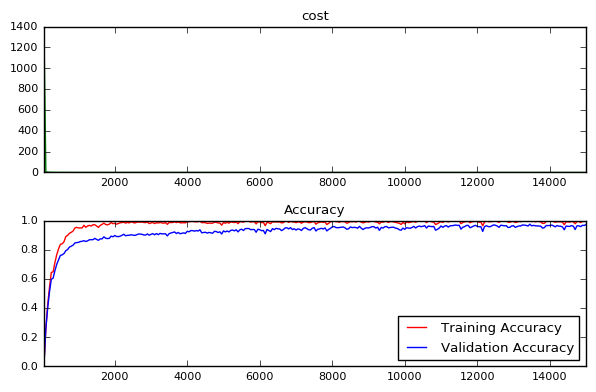

Execution Time: 0:06:51
training Accuracy at 0.9977675676345825
Validation Accuracy at 0.9688858389854431
Test accuracy at 0.8470313549041748


In [71]:
epochs = 60
batch_size = 150
learning_rate = 0.001

# Gradient Descent
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # adam is better
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) 
init = tf.initialize_all_variables()

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements for graphing cost and accuracy
log_batch_step = 50
batches = []
cost_batch = []
train_acc_batch = []
valid_acc_batch = []
l = 0
validation_accuracy = 0

    

with tf.Session() as session:
    saver = tf.train.Saver()
    session.run(init)
    batch_count = int(math.ceil(len(train_images)/batch_size))

    # Measure training time
    start_time = time.time()

    for epoch_i in range(epochs):

        # Progress bar
        batches_pbar = tqdm(range(batch_count), 
        desc='Epoch{:>2}/{} cost({:06.3f}) acc({:06.3f})'.format(epoch_i+1, epochs,l,validation_accuracy), 
        unit='batches')

        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_images[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]

            # Run optimizer and get cost
#             _, l = session.run([optimizer, cost],feed_dict={x: batch_features, y: batch_labels, keep_prob: 1.0})
            _, l = session.run([optimizer, cost],feed_dict={x: batch_features, y: batch_labels})
            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)


                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                cost_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

    # Check accuracy against Validation data
    validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)
    test_accuracy = session.run(accuracy, feed_dict=test_feed_dict)

    # Save Model
    save_path = saver.save(session, "./traffic.ckpt")
    
cost_plot = plt.subplot(211)
cost_plot.set_title('cost')
cost_plot.plot(batches, cost_batch, 'g')
cost_plot.set_xlim([batches[0], batches[-1]])


acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

test_seconds = (time.time() - start_time)
m, s = divmod(test_seconds, 60)
h, m = divmod(m, 60)
print("Execution Time: %d:%02d:%02d" % (h, m, s))

print('training Accuracy at {}'.format(training_accuracy))
print('Validation Accuracy at {}'.format(validation_accuracy))
print('Test accuracy at {}'.format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I decided on the Adam Optimizer after testing. It is faster. I tested a number of batch sizes and epochs. Though this network has a lot of fluctuations in training and validation that I was not able to remove it is able to produce results in the 90% range.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I tried different architectures but ran into memory limitations. This architecture is the result of trial and error. I started with the MNIST project and modified the code as I learned. It was difficult converting it into a convolutional network. I wanted to implement AlexNet but I would have to re-write my batching process to emplement mini-batch. Dropout didn't improve my accuracy so I have left it commented out for future use. I also found I got better results with 3x3 filters.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

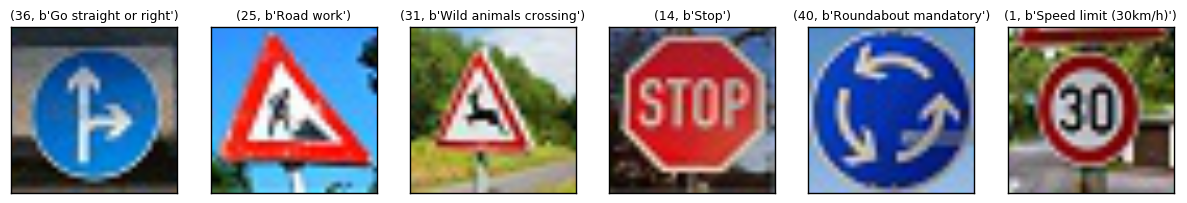

In [250]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import PIL
import glob, os
from matplotlib.pyplot import figure, imshow, axis
import matplotlib.image as mpimg


imagePath = glob.glob("example_signs_tiny/*.jpg")
new_images = np.array([np.array(Image.open(imagePath[i])) for i in range(len(imagePath))])


new_labels = np.array([[36],[25],[31],[14],[40],[1]])

# One-Hot Encode and normalize
one_hot(new_labels)
normalize(new_images)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
new_labels = new_labels.astype(np.float32)


fig = plt.figure(figsize=(15, 15))
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_axis_off()
fig.add_axes(ax)

i = 1
for image in new_images:
    plt.subplot(1,6,i)
    sname1 = new_labels[i-1].astype(int)
    sname2 = sign_names[sname1]
    plt.title(*sname2, fontsize=9)
    imshow(image)   
    plt.xticks(())
    plt.yticks(())
    i = i+1

    
# FOR TESTING
# 48,51,56,61,62,68,82*,96,114 = 30kph
# 11,30,79,102*,115,127,134 = Road Work
# 33 = Roundabout mandatory
# 101 = Stop
# 103 = Animal Crossing

# plt.subplot(1,6,6)
# imshow(train_images[135]) 
# print(*train_labels[135].astype(int))
# print(sign_names[34])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I chose six images that I collected from Google search. They are displayed above. These images are pretty clear and shouldn't be hard to identify. My model has difficulty identifying (31 "wild animals crossing"). This could be due to it's triangular shape or there aren't enough images of it in the training set. I could implement jittering to add more data to the dataset. 

In [358]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

saver = tf.train.Saver()
predict = tf.argmax(logits,1)
soft = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, './traffic.ckpt')
    test_pred = sess.run(predict, feed_dict = {x: new_images})  
    test_pred2 = sess.run(soft, feed_dict = {x: new_images}) 
    softmax_probabilities = sess.run(tf.nn.softmax(logits), feed_dict= {x: new_images})
    top_results = sess.run(tf.nn.top_k(softmax_probabilities, k=3))
    
print(test_pred)
print('------------------------')
for i in range(0, 6):
    print(str(sign_names[test_pred[i]]).replace("b'",'').replace('(','').replace("')",'').replace(")",''))



[36 25  2 14 40  1]
------------------------
36, Go straight or right
25, Road work
2, Speed limit 50km/h
14, Stop
40, Roundabout mandatory
1, Speed limit 30km/h


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Overall test set accuracy is 84.7%. My model got five out of six correct or 84% accuracy for new signs. 

In [353]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

for c in range(0, 6):
    for i in range(0, 3):
        temps = str(sign_names[top_results.indices[c][i]]).replace("b'",'').replace('(','').replace("')",'')
        print('Sign: {0:30}'.format(temps),
              ' With probability: {0:10f}'.format(top_results.values[c][i]))

    print('------------------------------------------------------------------')


Sign: 36, Go straight or right        With probability:   1.000000
Sign: 0, Speed limit 20km/h)          With probability:   0.000000
Sign: 1, Speed limit 30km/h)          With probability:   0.000000
------------------------------------------------------------------
Sign: 25, Road work                   With probability:   0.997721
Sign: 15, No vehicles                 With probability:   0.002273
Sign: 29, Bicycles crossing           With probability:   0.000007
------------------------------------------------------------------
Sign: 2, Speed limit 50km/h)          With probability:   0.997870
Sign: 13, Yield                       With probability:   0.002128
Sign: 23, Slippery road               With probability:   0.000001
------------------------------------------------------------------
Sign: 14, Stop                        With probability:   1.000000
Sign: 25, Road work                   With probability:   0.000000
Sign: 3, Speed limit 60km/h)          With probability:   0.00

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** One of the signs that it is uncertain of has a triangular shape as mentioned above. More training epochs improves the results and implementing mini-batch would allow me to build a larger network and not exceed my memory limitations.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.